
# Khipus.ai
## Applied Statistics with Python
### Inferential Statistics (Predictions): Normal distribution, Central Limit Theorem (CLT), confidence intervals and margin of error, T-distribution.
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data_dev_survey = pd.read_csv('data_dev.csv')
data_dev_survey.head()

,response_id,work_as_dev,age,employment,remote_work,coding_activities,ed_level,dev_type,years_code,years_code_pro,...,op_sys_professional_use,ai_view,ai_trust,ic_or_manager,work_exp,industry,us_or_not,plans_to_use_ai,converted_comp_yearly,survey_completion_date
0,164,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",14.0,10,...,Ubuntu;Windows,Very favorable,Somewhat trust,Individual contributor,10,"Information Services, IT, Software Development...",Not US,Using,3237,2023-05-02
1,165,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Data scientist or machine learning specialist,7.0,5,...,Ubuntu,Very favorable,Somewhat trust,Individual contributor,7,"Information Services, IT, Software Development...",Not US,Using,52046,2023-05-05
2,190,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Data scientist or machine learning specialist,8.0,8,...,Ubuntu;Windows,Favorable,Somewhat trust,Individual contributor,16,"Information Services, IT, Software Development...",Not US,Using,74963,2023-05-13
3,218,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,Some college/university study without earning ...,Database administrator,29.0,17,...,Red Hat;Windows,Very favorable,Somewhat trust,Individual contributor,17,Wholesale,Not US,Plan to use,56757,2023-05-28
4,220,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Engineer, data",7.0,6,...,MacOS;Windows,Favorable,Somewhat trust,Individual contributor,7,NaN,Not US,Using,74963,2023-05-31



## Normal Distribution
The normal distribution, also known as the Gaussian distribution, is a bell-shaped curve that is symmetric about the mean. It is defined by its mean (μ) and standard deviation (σ).

### Example:
Below is an example of how to generate and visualize a normal distribution using Python.


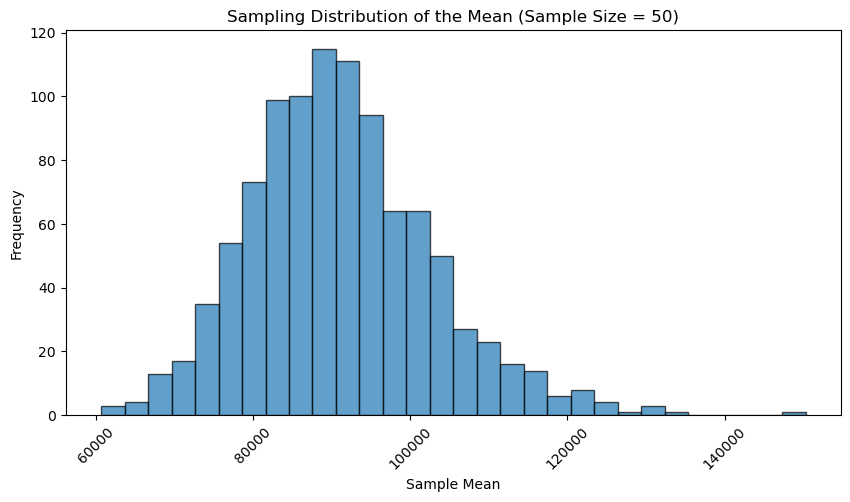

In [11]:
# Think of our data as a population to draw from
population = data_dev_survey['converted_comp_yearly'].dropna().values

# Generate a large sample from the 'converted_comp_yearly' column
# Parameters
sample_size = 50
num_samples = 1000

# Set a seed to make code reproducible
np.random.seed(2024)

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Plot the sampling distribution of the sample means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Sampling Distribution of the Mean (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

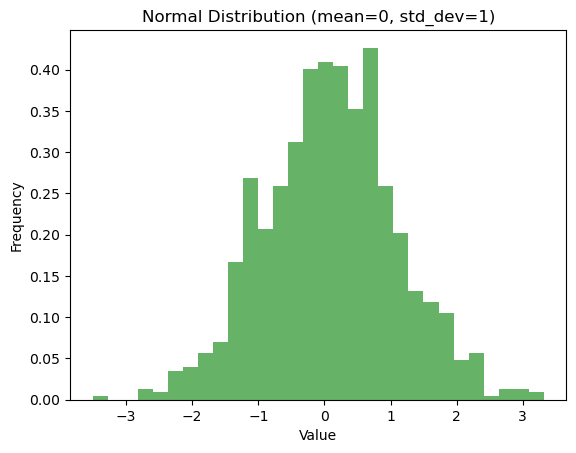

In [1]:


# Parameters for the normal distribution
mean = 0
std_dev = 1
sample_size = 1000

# Generate data
data = np.random.normal(mean, std_dev, sample_size)

# Plot the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution (mean=0, std_dev=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



## Central Limit Theorem (CLT)
The Central Limit Theorem states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution.

### Example:
Below is an example demonstrating the CLT by sampling from a uniform distribution.


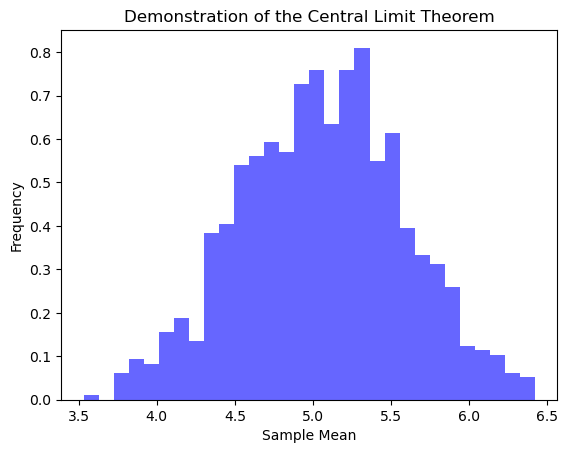

In [2]:

# Parameters
population = np.random.uniform(0, 10, 10000)
sample_means = []

# Draw 1000 samples of size 30
for _ in range(1000):
    sample = np.random.choice(population, 30)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
plt.title('Demonstration of the Central Limit Theorem')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()



## Confidence Intervals and Margin of Error
A confidence interval is a range of values that is likely to contain the population parameter with a certain level of confidence. The margin of error is the amount of error that can be tolerated.

### Example:
Below is an example of calculating a 95% confidence interval for a sample mean.


In [3]:

import scipy.stats as stats

# Generate a sample
sample = np.random.normal(50, 10, 100)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Calculate the margin of error
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(n))

# Confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Sample Mean: 50.60
95% Confidence Interval: [48.37, 52.82]



## T-Distribution
The t-distribution is similar to the normal distribution but has heavier tails, making it useful for small sample sizes.

### Example:
Below is an example of comparing the t-distribution with the normal distribution.


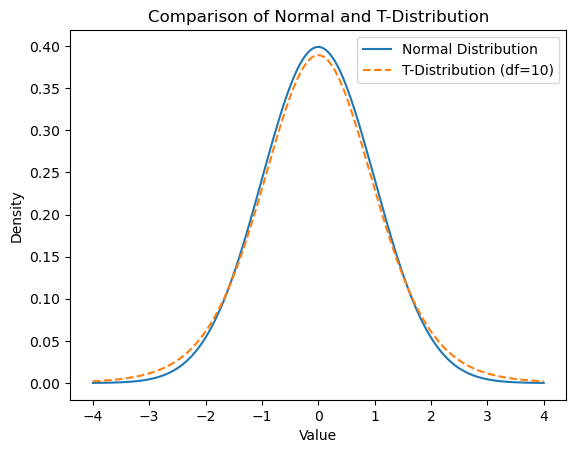

In [4]:

x = np.linspace(-4, 4, 1000)
normal_pdf = stats.norm.pdf(x)
t_pdf = stats.t.pdf(x, df=10)

# Plot
plt.plot(x, normal_pdf, label='Normal Distribution')
plt.plot(x, t_pdf, label='T-Distribution (df=10)', linestyle='dashed')
plt.title('Comparison of Normal and T-Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
